LAB CYCLE 1

A. Image Negative
1. Implement the image negative transformation function and apply it to a grayscale image.
2. Analyze the effect of image negative on different types of images (e.g., low contrast, high
contrast).
3. Compare the histogram of an original image with its negative. Explain the observed
differences.

Enter the path to the grayscale image: /content/lena.jpg


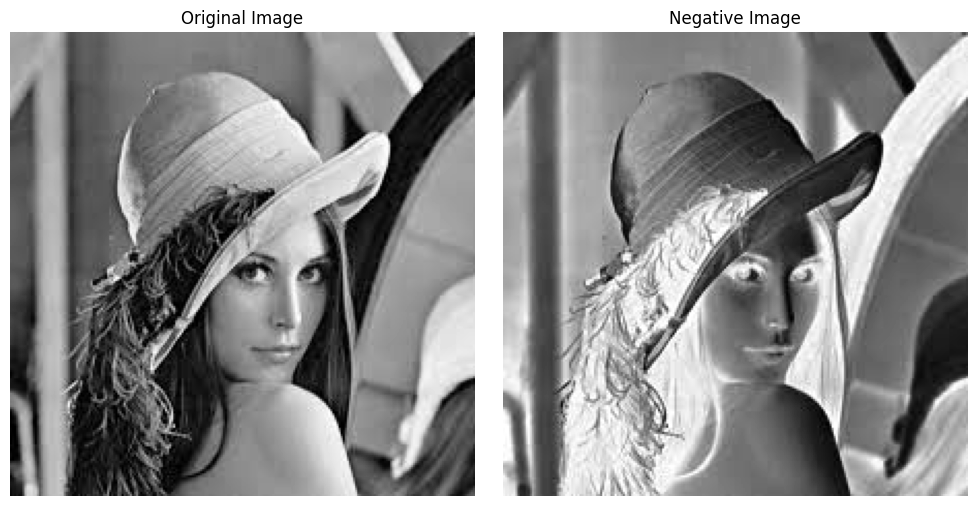

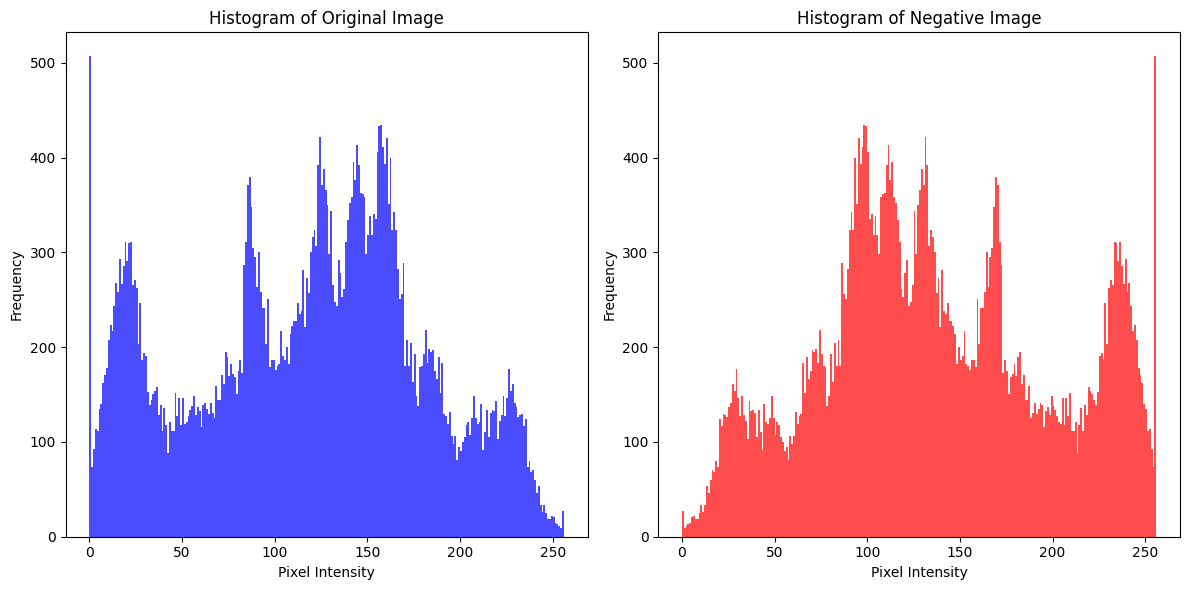

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply image negative transformation
def image_negative(image):
    # Check if image is grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply negative transformation
    negative_image = 255 - image
    return negative_image

# Function to plot histograms of original and negative images
def plot_histograms(original, negative):
    # Plot histogram of the original image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(original.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
    plt.title('Histogram of Original Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Plot histogram of the negative image
    plt.subplot(1, 2, 2)
    plt.hist(negative.ravel(), bins=256, range=(0, 256), color='red', alpha=0.7)
    plt.title('Histogram of Negative Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Main code
def main():
    # Load an image
    image_path = input("Enter the path to the grayscale image: ")
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if original_image is None:
        print("Could not open or find the image.")
        return

    # Apply the negative transformation
    negative_image = image_negative(original_image)

    # Display the original and negative images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(negative_image, cmap='gray')
    plt.title('Negative Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Plot and compare histograms
    plot_histograms(original_image, negative_image)

if __name__ == "__main__":
    main()


B. Log Transformation
1. Implement the log transformation function and apply it to an image with a narrow range of
low gray-level values.
2. Analyze the effect of the log transformation on enhancing details in dark regions of an image.
3. Experiment with different values of the constant 'c' in the log transformation equation and
observe the changes in output image.


Enter the path to the grayscale image: /content/lena.jpg


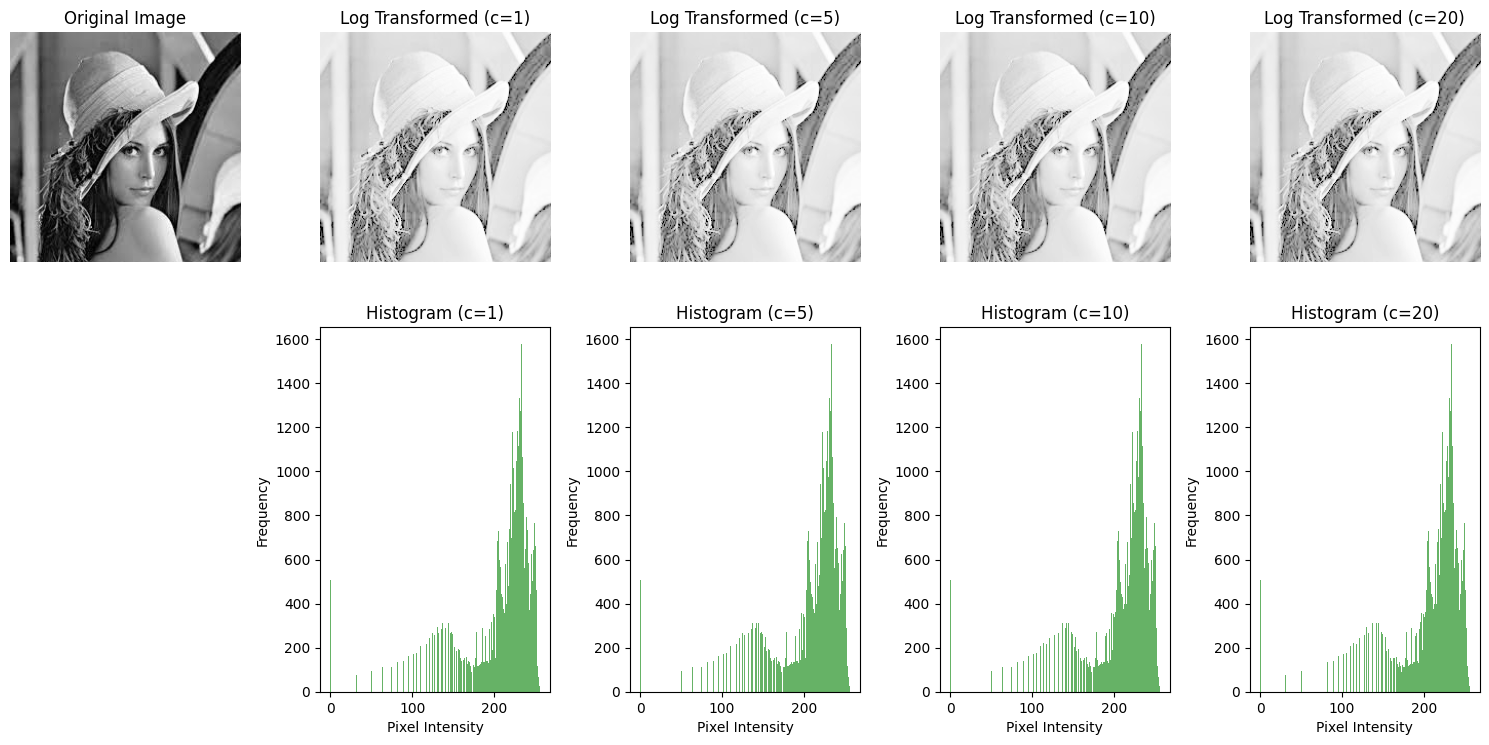

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply log transformation
def log_transform(image, c):
    # Ensure the image is grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply log transformation
    log_image = c * np.log1p(image.astype(np.float32))
    # Normalize to 8-bit range [0, 255]
    log_image = cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX)
    log_image = np.uint8(log_image)

    return log_image

# Function to display and analyze the effect of log transformation
def analyze_log_transform(image, c_values):
    plt.figure(figsize=(15, 8))

    # Display original image
    plt.subplot(2, len(c_values) + 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Apply and display log transformation for different values of c
    for i, c in enumerate(c_values, start=2):
        transformed_image = log_transform(image, c)

        # Display the transformed image
        plt.subplot(2, len(c_values) + 1, i)
        plt.imshow(transformed_image, cmap='gray')
        plt.title(f'Log Transformed (c={c})')
        plt.axis('off')

        # Plot the histogram of the transformed image
        plt.subplot(2, len(c_values) + 1, i + len(c_values) + 1)
        plt.hist(transformed_image.ravel(), bins=256, range=(0, 256), color='green', alpha=0.6)
        plt.title(f'Histogram (c={c})')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Main code
def main():
    # Load an image
    image_path = input("Enter the path to the grayscale image: ")
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Could not open or find the image.")
        return

    # Define different values of 'c' to experiment with
    c_values = [1, 5, 10, 20]

    # Analyze the effect of log transformation
    analyze_log_transform(image, c_values)

if __name__ == "__main__":
    main()


C. Power-Law Transformation
1. Implement the power-law transformation function with different values of gamma.
2. Apply the power-law transformation to enhance images with different contrast characteristics.
3. Analyze the effect of gamma values on the image appearance, especially for values less than
and greater than 1.
4. Experiment with different image types (e.g., medical, satellite, natural) to observe the impact
of transformations.

Enter the path to the grayscale image: /content/lena.jpg


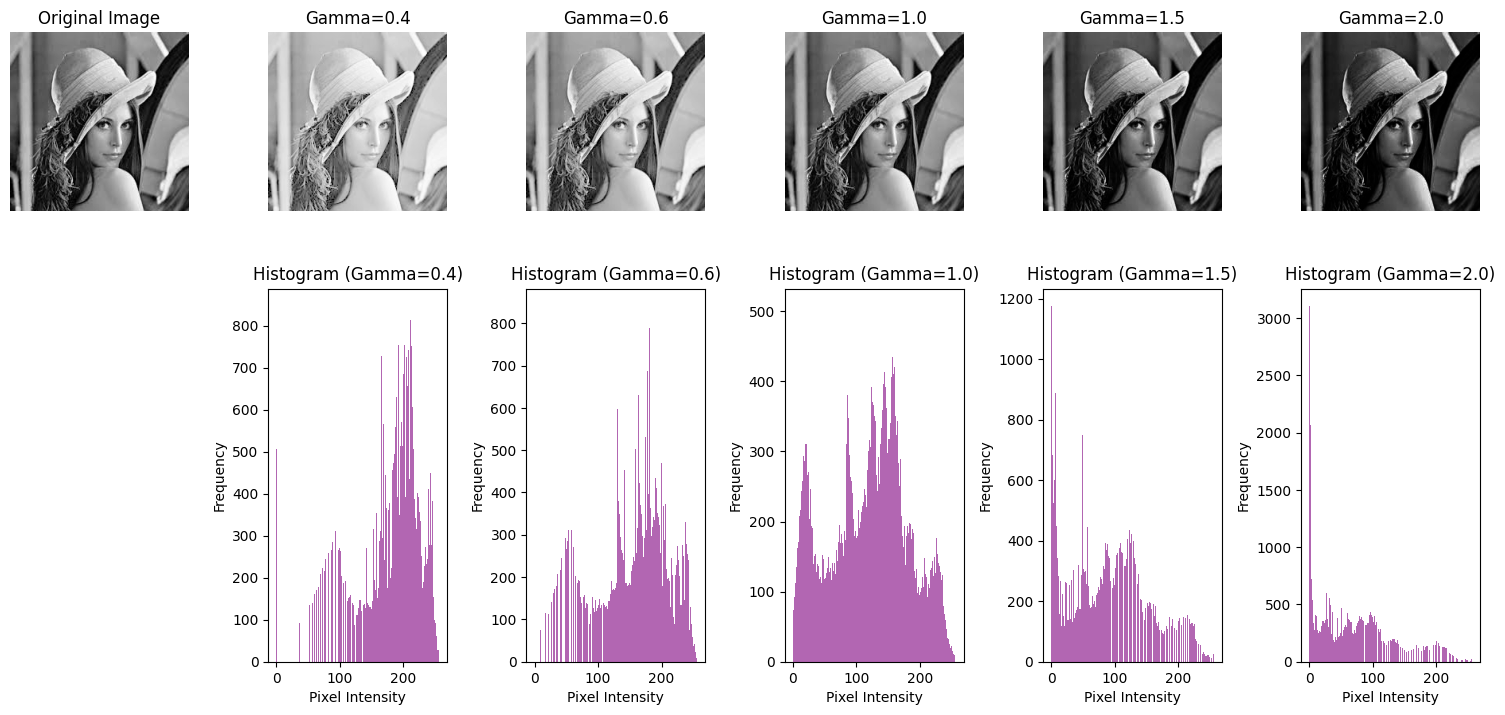

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply power-law (gamma) transformation
def power_law_transform(image, gamma, c=1):
    # Ensure the image is grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize the image to the range [0, 1] for transformation
    normalized_image = image / 255.0

    # Apply power-law transformation
    transformed_image = c * (normalized_image ** gamma)

    # Scale back to the range [0, 255] and convert to 8-bit unsigned integer
    transformed_image = np.uint8(cv2.normalize(transformed_image, None, 0, 255, cv2.NORM_MINMAX))

    return transformed_image

# Function to display results for different gamma values
def analyze_power_law_transform(image, gamma_values, c=1):
    plt.figure(figsize=(15, 8))

    # Display original image
    plt.subplot(2, len(gamma_values) + 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Apply and display power-law transformation for each gamma
    for i, gamma in enumerate(gamma_values, start=2):
        transformed_image = power_law_transform(image, gamma, c)

        # Display transformed image
        plt.subplot(2, len(gamma_values) + 1, i)
        plt.imshow(transformed_image, cmap='gray')
        plt.title(f'Gamma={gamma}')
        plt.axis('off')

        # Plot histogram of the transformed image
        plt.subplot(2, len(gamma_values) + 1, i + len(gamma_values) + 1)
        plt.hist(transformed_image.ravel(), bins=256, range=(0, 256), color='purple', alpha=0.6)
        plt.title(f'Histogram (Gamma={gamma})')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Main code
def main():
    # Load an image
    image_path = input("Enter the path to the grayscale image: ")
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Could not open or find the image.")
        return

    # Define different gamma values to experiment with
    gamma_values = [0.4, 0.6, 1.0, 1.5, 2.0]

    # Analyze the effect of power-law transformation
    analyze_power_law_transform(image, gamma_values)

if __name__ == "__main__":
    main()


D. Spatial Filtering
1. Implement mean, median, and Gaussian filters. Apply them to images with different noise
types (salt-and-pepper, Gaussian) and compare the results.
2. Design a custom filter for sharpening edges while preserving image details. Apply it to a
natural image and evaluate its performance.
3. Experiment with different Laplacian operators (4-connected, 8-connected) and compare their
edge detection capabilities.

Enter the path to the grayscale image: /content/lena.jpg


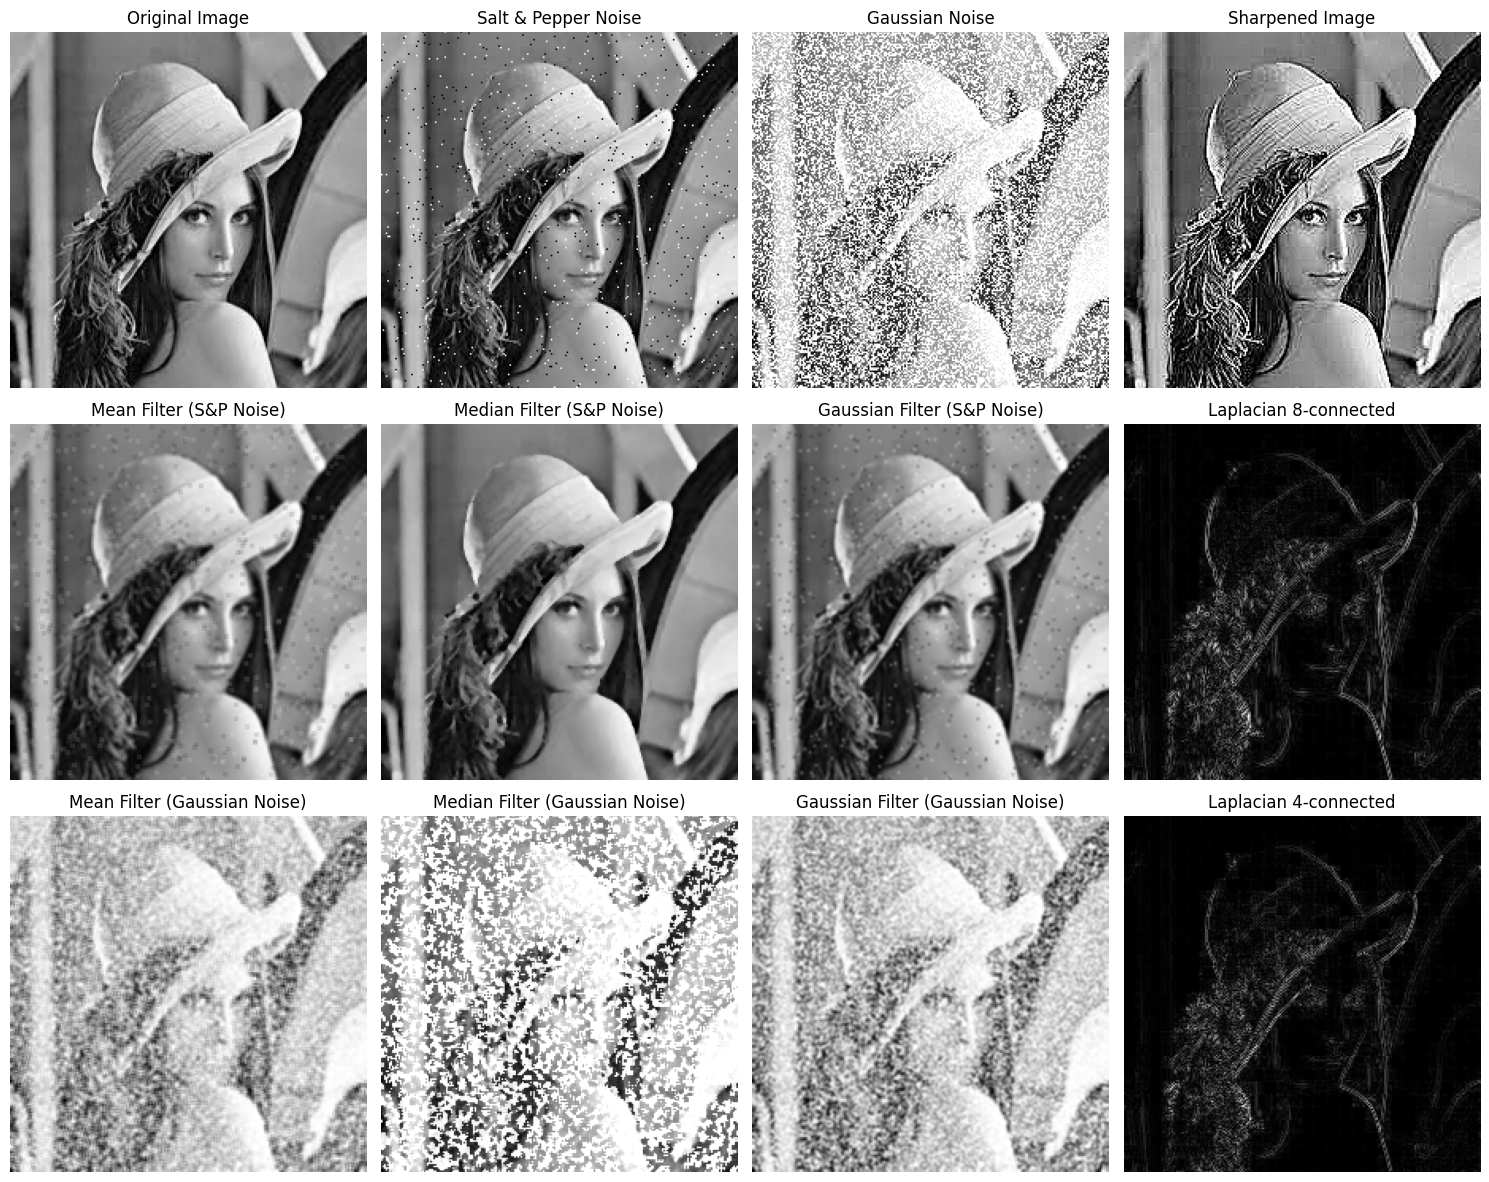

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add noise to an image
def add_noise(image, noise_type="salt_and_pepper"):
    noisy_image = image.copy()
    if noise_type == "salt_and_pepper":
        # Add salt and pepper noise
        prob = 0.02  # Probability of noise
        for i in range(noisy_image.shape[0]):
            for j in range(noisy_image.shape[1]):
                rand = np.random.rand()
                if rand < prob / 2:
                    noisy_image[i, j] = 0
                elif rand < prob:
                    noisy_image[i, j] = 255
    elif noise_type == "gaussian":
        # Add Gaussian noise
        mean = 0
        stddev = 25
        gaussian_noise = np.random.normal(mean, stddev, image.shape)
        noisy_image = cv2.add(image, gaussian_noise.astype(np.uint8))
    return noisy_image

# Function to apply spatial filters
def apply_filters(image):
    mean_filtered = cv2.blur(image, (3, 3))  # Mean filter
    median_filtered = cv2.medianBlur(image, 3)  # Median filter
    gaussian_filtered = cv2.GaussianBlur(image, (3, 3), 0)  # Gaussian filter
    return mean_filtered, median_filtered, gaussian_filtered

# Function to apply custom sharpening filter
def custom_sharpen(image):
    # Define sharpening kernel
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

# Function to apply Laplacian operators
def laplacian_filters(image):
    laplacian_4 = cv2.Laplacian(image, cv2.CV_64F, ksize=1)  # 4-connected Laplacian
    laplacian_8 = cv2.Laplacian(image, cv2.CV_64F, ksize=3)  # 8-connected Laplacian
    return laplacian_4, laplacian_8

# Main function to perform all filtering operations
def main():
    # Load an image
    image_path = input("Enter the path to the grayscale image: ")
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Could not open or find the image.")
        return

    # Add noise to the image
    salt_pepper_noisy = add_noise(image, "salt_and_pepper")
    gaussian_noisy = add_noise(image, "gaussian")

    # Apply mean, median, and Gaussian filters to noisy images
    mean_sp, median_sp, gaussian_sp = apply_filters(salt_pepper_noisy)
    mean_gn, median_gn, gaussian_gn = apply_filters(gaussian_noisy)

    # Apply custom sharpening filter
    sharpened_image = custom_sharpen(image)

    # Apply Laplacian filters for edge detection
    laplacian_4, laplacian_8 = laplacian_filters(image)

    # Display results
    plt.figure(figsize=(15, 12))

    # Original and noisy images
    plt.subplot(3, 4, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
    plt.axis('off')
    plt.subplot(3, 4, 2), plt.imshow(salt_pepper_noisy, cmap='gray'), plt.title("Salt & Pepper Noise")
    plt.axis('off')
    plt.subplot(3, 4, 3), plt.imshow(gaussian_noisy, cmap='gray'), plt.title("Gaussian Noise")
    plt.axis('off')

    # Filters on Salt-and-Pepper Noise
    plt.subplot(3, 4, 5), plt.imshow(mean_sp, cmap='gray'), plt.title("Mean Filter (S&P Noise)")
    plt.axis('off')
    plt.subplot(3, 4, 6), plt.imshow(median_sp, cmap='gray'), plt.title("Median Filter (S&P Noise)")
    plt.axis('off')
    plt.subplot(3, 4, 7), plt.imshow(gaussian_sp, cmap='gray'), plt.title("Gaussian Filter (S&P Noise)")
    plt.axis('off')

    # Filters on Gaussian Noise
    plt.subplot(3, 4, 9), plt.imshow(mean_gn, cmap='gray'), plt.title("Mean Filter (Gaussian Noise)")
    plt.axis('off')
    plt.subplot(3, 4, 10), plt.imshow(median_gn, cmap='gray'), plt.title("Median Filter (Gaussian Noise)")
    plt.axis('off')
    plt.subplot(3, 4, 11), plt.imshow(gaussian_gn, cmap='gray'), plt.title("Gaussian Filter (Gaussian Noise)")
    plt.axis('off')

    # Custom Sharpening and Laplacian Edge Detection
    plt.subplot(3, 4, 4), plt.imshow(sharpened_image, cmap='gray'), plt.title("Sharpened Image")
    plt.axis('off')
    plt.subplot(3, 4, 12), plt.imshow(np.abs(laplacian_4), cmap='gray'), plt.title("Laplacian 4-connected")
    plt.axis('off')
    plt.subplot(3, 4, 8), plt.imshow(np.abs(laplacian_8), cmap='gray'), plt.title("Laplacian 8-connected")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


E. Image Enhancement: Arithmetic/Logic Operations
4. Implement image subtraction to detect changes between two images (e.g., before and after an
event).
5. Create a simple image watermarking system using image addition and subtraction.
6. Experiment with image averaging to reduce noise in a sequence of images.

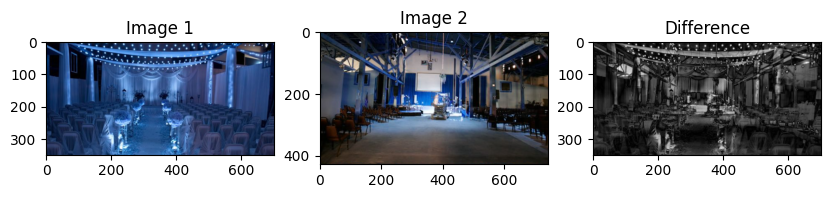

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Image Subtraction for Change Detection
def image_subtraction(image1, image2):
    # Convert images to grayscale if they're not already
    if len(image1.shape) == 3:
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    if len(image2.shape) == 3:
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Resize images to the same size if necessary
    if image1.shape != image2.shape:
        image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    # Subtract the images and take the absolute difference
    difference = cv2.absdiff(image1, image2)
    return difference

# Main function to test image subtraction
def main():
    # Load images for subtraction (e.g., before and after an event)
    image1_path = '/content/after.png'  # Example path
    image2_path = '/content/before.png'  # Example path

    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    if image1 is None or image2 is None:
        print("Could not open one or both images for subtraction.")
        return

    # Perform image subtraction
    subtracted_image = image_subtraction(image1, image2)

    # Display subtraction result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1), plt.imshow(image1, cmap='gray'), plt.title("Image 1")
    plt.subplot(1, 3, 2), plt.imshow(image2, cmap='gray'), plt.title("Image 2")
    plt.subplot(1, 3, 3), plt.imshow(subtracted_image, cmap='gray'), plt.title("Difference")
    plt.show()

if __name__ == "__main__":
    main()


Enter the path to the image for watermarking: /content/watermarked_image.png
Enter the path to the watermark image: /content/orginal_image.png


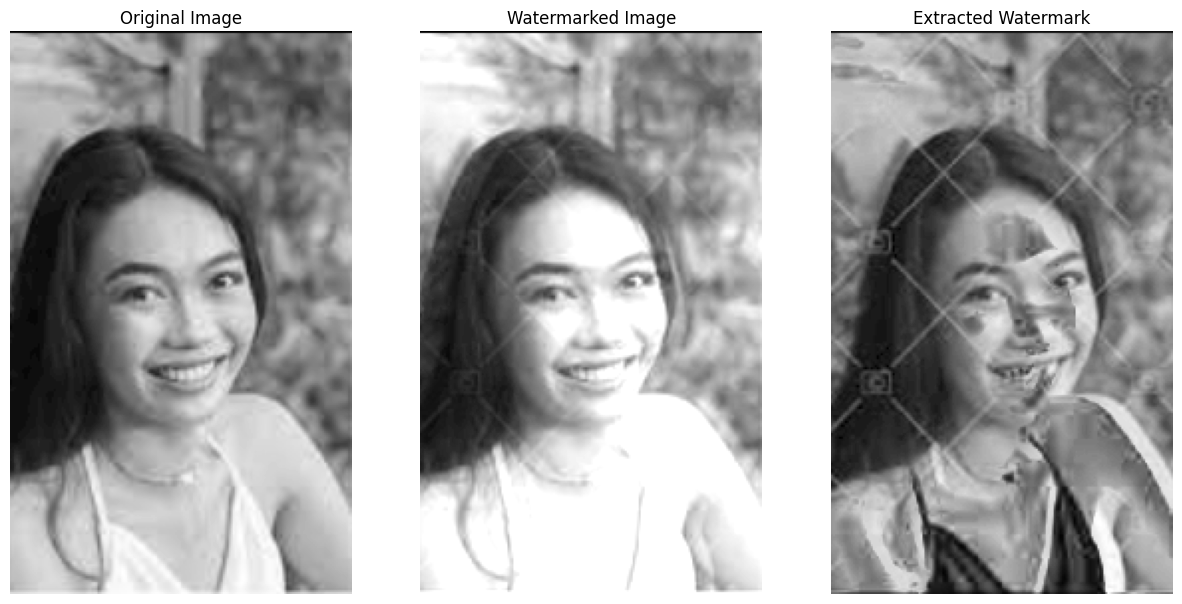

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add a watermark to an image
def add_watermark(image, watermark, alpha=0.3):
    # Resize watermark to match the image size
    watermark_resized = cv2.resize(watermark, (image.shape[1], image.shape[0]))

    # Ensure images are in grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if len(watermark_resized.shape) == 3:
        watermark_resized = cv2.cvtColor(watermark_resized, cv2.COLOR_BGR2GRAY)

    # Add watermark to the image using weighted sum
    watermarked_image = cv2.addWeighted(image, 1, watermark_resized, alpha, 0)
    return watermarked_image

# Function to extract watermark by subtracting
def extract_watermark(original_image, watermarked_image, alpha=0.3):
    # Subtract the watermark from the watermarked image to retrieve it
    extracted_watermark = cv2.subtract(watermarked_image, original_image)
    return extracted_watermark

# Main function to test the watermarking system
def main():
    # Load the main image and watermark
    image_path = input("Enter the path to the image for watermarking: ")
    watermark_path = input("Enter the path to the watermark image: ")

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    watermark = cv2.imread(watermark_path, cv2.IMREAD_GRAYSCALE)

    if image is None or watermark is None:
        print("Could not open the image or watermark for watermarking.")
        return

    # Add watermark to the image
    watermarked_image = add_watermark(image, watermark)

    # Extract the watermark from the watermarked image
    extracted_watermark = extract_watermark(image, watermarked_image)

    # Display the original, watermarked, and extracted images
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
    plt.axis('off')
    plt.subplot(1, 3, 2), plt.imshow(watermarked_image, cmap='gray'), plt.title("Watermarked Image")
    plt.axis('off')
    plt.subplot(1, 3, 3), plt.imshow(extracted_watermark, cmap='gray'), plt.title("Extracted Watermark")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


Enter the path to the image file for noise reduction: /content/image_noise.jpg


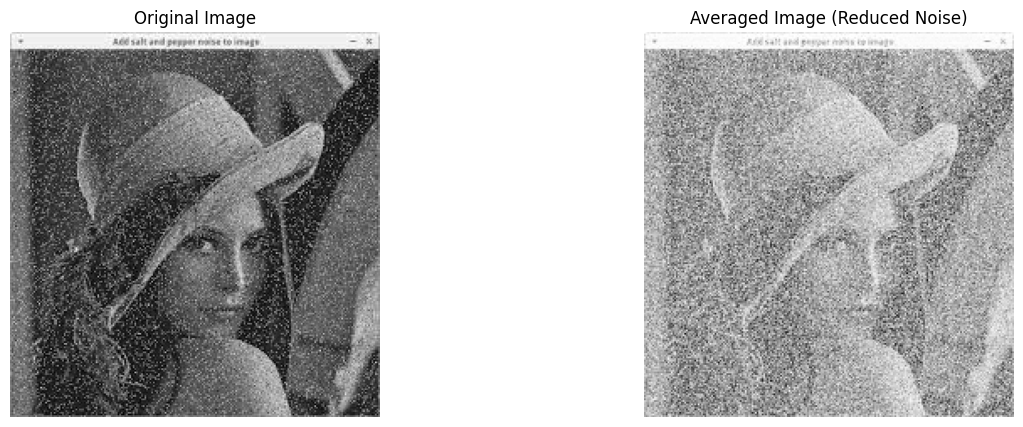

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add Gaussian noise to an image
def add_noise(image, mean=0, stddev=10):
    noise = np.random.normal(mean, stddev, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

# Function to perform image averaging
def image_averaging(image, num_noisy_images=10):
    # Initialize an array to accumulate the sum of noisy images
    avg_image = np.zeros_like(image, dtype=np.float32)

    # Generate noisy images and accumulate them
    for _ in range(num_noisy_images):
        noisy_image = add_noise(image)
        avg_image += noisy_image.astype(np.float32)

    # Average the accumulated image
    avg_image /= num_noisy_images

    # Convert the averaged image to uint8 for display
    avg_image = np.uint8(avg_image)
    return avg_image

# Main function to load image, add noise, and perform averaging
def main():
    # Load a single image file
    image_path = input("Enter the path to the image file for noise reduction: ")
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Could not open the image.")
        return

    # Perform image averaging
    averaged_image = image_averaging(image, num_noisy_images=10)

    # Display the original, noisy, and averaged (denoised) images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
    plt.axis('off')
    plt.subplot(1, 2, 2), plt.imshow(averaged_image, cmap='gray'), plt.title("Averaged Image (Reduced Noise)")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()
